**How to Generate Test Data for Machine Learning in Python using Sklearn dataset generators: Make_Regression and Make_Classification:**

Good datasets may not be easy to find, and looking for, selecting, extracting, and cleaning a real-life dataset may take more time than actually understanding the algorithm you would like to test.

Scikit-learn famous standard datasets boston, diabetes, digits, linnerud, iris, wine, and breat_cancer are often sufficient to quickly illustrate the behavior of various machine learning algorithms. However, these are small 'Toy' datasets, and in some situations, you may want to have access to more flexible datasets that would fit specific machine learning test problems, and asnwer specific questions like: can your model handle noisy labels? can your model tell you which features are redundant? what happens when redundant features, noise and imbalance are all present in your dataset?

And guess what? scikit-learn offers you that option too! Your best friend also includes random sample generators allowing you to build synthetic datasets with different distributions and profiles to help you experiment your classification, regression, and clustering algorithms. 

In this blog we will try to illustrate how make_regression and make_classification sample generators work.


**Section 1: make_classification:**

Make_classification create multiclass datasets by allocating each class one or more normally-distributed clusters of points. It introduces interdependence between these features and adds various types of further noise to the data.

Here are make_classification default parameters: (n_samples=100, n_features=20, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)	

The main parameters you might want to play with are the following:
<br>n_samples : The number of samples generated in the dataset.
<br>n_features : The total number of features generated.
<br>n_informative : The number of informative features.
<br>n_redundant : The number of redundant features. These features are generated as random linear combinations of the informative features.
<br>n_repeated : The number of duplicated features, drawn randomly from the informative and the redundant features.
<br>n_classes : The number of classes (or labels) of the classification problem.
<br>n_clusters_per_class : The number of clusters per class.
<br>weights : The proportions of samples assigned to each class.
<br>class_sep : Larger values spread out the clusters/classes and make the classification task easier.
<br>random_state : to make output reproducible.<br>

In the example below, we are going to genenate a synthetic classification problem that includes 5 informative features and double-check whether Catboost classifier can spot them and evaluate their relative importance.



In [2]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [18]:
# Let's build a classification task using 5 informative features. Our goal being to see if Catboost is able to spot and rank informative features
X, y = make_classification(
    n_samples=1000, # generates 1000 samples
    n_features=10, # generates 10 features
    n_informative=5, # only 1/2 of the features will actually be useful for this classification problem
    n_redundant=0, # none of the features will be redundant
    n_repeated=0, # none of the features will be repeated
    n_classes=2, # I want the generator to only create 2 classes
    n_clusters_per_class=1, # each class will includes only 1 cluster
    weights=None, # I want my data to be balanced
    random_state=2 # let's make this problem reproducible
)

In [19]:
# Make the usual train-test split:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
# Import Catboost, instantiate it and fit it to generated data:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(iterations=30,
    learning_rate=0.1,
    eval_metric='Precision')
 
cbc.fit(X_train, y_train)

# Pull up feature importances:
importance = cbc.feature_importances_

0:	learn: 0.9190751	total: 76.1ms	remaining: 2.21s
1:	learn: 0.9050279	total: 89.2ms	remaining: 1.25s
2:	learn: 0.9209040	total: 99.5ms	remaining: 895ms
3:	learn: 0.9339080	total: 110ms	remaining: 713ms
4:	learn: 0.9394813	total: 120ms	remaining: 600ms
5:	learn: 0.9340974	total: 130ms	remaining: 520ms
6:	learn: 0.9420290	total: 140ms	remaining: 461ms
7:	learn: 0.9394813	total: 151ms	remaining: 416ms
8:	learn: 0.9421965	total: 165ms	remaining: 386ms
9:	learn: 0.9421965	total: 177ms	remaining: 354ms
10:	learn: 0.9394813	total: 188ms	remaining: 325ms
11:	learn: 0.9394813	total: 199ms	remaining: 298ms
12:	learn: 0.9421965	total: 209ms	remaining: 274ms
13:	learn: 0.9367816	total: 219ms	remaining: 251ms
14:	learn: 0.9478261	total: 229ms	remaining: 229ms
15:	learn: 0.9478261	total: 239ms	remaining: 209ms
16:	learn: 0.9450867	total: 249ms	remaining: 190ms
17:	learn: 0.9478261	total: 261ms	remaining: 174ms
18:	learn: 0.9449275	total: 275ms	remaining: 159ms
19:	learn: 0.9449275	total: 285ms	rema

In [20]:
# Display feature importances in pandas dataframe:
features=['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9']
relative_score = cbc.feature_importances_

d={'Feature': features, "Feature Importance": relative_score}
df = pd.DataFrame(d)

print()
print("Feature ranking:")
df


Feature ranking:


,Feature,Feature Importance
0,feature_0,0.651835
1,feature_1,0.954872
2,feature_2,7.824673
3,feature_3,45.012910
4,feature_4,13.594171
5,feature_5,0.756293
6,feature_6,0.592782
7,feature_7,0.667226
8,feature_8,23.489231
9,feature_9,6.456008


Feature ranking plotted:


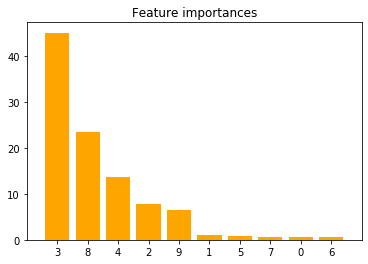

In [8]:
# Return the indices and sort them.
indices = np.argsort(importance)[::-1]

# Print the feature ranking
print("Feature ranking plotted:")

# Plot feature importances:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importance[indices],
       color="orange", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

The orange bars are the feature importances. As we could expect, the plot suggests that 5 features are informative, this confirms that Catboost can evaluate the importance of features on an artificial classification task. 

**Section 2: make_regression:**
        
In this example, we are going to use scikit-learn's make_regression to compare the linear regression and lasso regression models coefficients, to see which of this method performs the best in terms of feature selection, using coefficients.

Here are make_regression default parameters: (n_samples=100, n_features=100, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)

The parameters you are most likely to use are the following:
<br>n_samples : The number of samples generated in the dataset.
<br>n_features : The total number of features generated. 
<br>n_informative : The number of informative features.
<br>n_targets : The number of targets generated.
<br>bias : The bias term in the underlying linear model.
<br>noise : The standard deviation of the gaussian noise applied to the output.
<br>coef : Can be set to 'True' to return the coefficients of the underlying linear model.
<br>random_state : to make output reproducible.



In [21]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso

In [22]:
# Let's build a regression problem using 5 informative features. Our goal being to see if Lasso regularization method is more efficient than the classic Linear Regression to extract those features which contribute the most to the model training

X,y, coef = make_regression(
        n_samples=1000, # generates 1000 samples
        n_features=10, # generates 10 features 
        n_informative=5, # only 1/2 of the features will actually be useful for this classification problem
        n_targets=1, # we will need only one target for this example
        bias=0, # we do not need to introduce any bias for this case
        noise=500, # let's introduce some noise
        coef=True, # we will need the generator to return the coefficients of the linear model generated
        random_state=1 # let's make the output reproducible
)


In [23]:
# Let's show in a dataframe the true coefficients made by our make_regression generator:
true_coefs = pd.DataFrame(coef, columns =['true_coefs'], index=['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9'])
true_coefs.T

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
true_coefs,0.0,26.746067,3.285346,0.0,0.0,86.50811,0.0,0.0,93.322255,12.444828


In [24]:
# Let's make the usual train-test split:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
# Let's find the best alpha (=regularization strength) for Lasso:
from sklearn.linear_model import LassoCV

# Set up a list of Lasso alphas to check.
best_alpha_lasso = np.linspace(0.1, 100, 100)

# Cross-validate over our list of Lasso alphas.
lasso_model = LassoCV(alphas=best_alpha_lasso, cv=5)

# Fit model using best Lasso alphas.
lasso_model = lasso_model.fit(X_train, y_train)
lasso_optimal_alpha = lasso_model.alpha_

print("Best alpha for Lasso: " , lasso_optimal_alpha)

Best alpha for Lasso:  20.28181818181818


In [26]:
# Compare Lasso's coefficients to classic Linear Regression's ones:
linreg = LinearRegression()
lasso = Lasso(alpha=lasso_model.alpha_)

models = [linreg, lasso]
model_names = ['LinearRegression', 'Lasso']

for model in models:
    model.fit(X_train, y_train),
    
pd.DataFrame(data=[coef, linreg.coef_, lasso.coef_], columns=['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9'], index=['true_coef','predicted_coef_linear_regression', 'predicted_coef_lasso_regression'])   

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
true_coef,0.000000,26.746067,3.285346,0.000000,0.000000,86.508110,0.000000,0.000000,93.322255,12.444828
predicted_coef_linear_regression,1.866844,25.702129,-3.679188,-6.112337,34.886585,92.493703,20.896593,18.801634,43.946286,0.984736
predicted_coef_lasso_regression,0.000000,10.206847,-0.000000,-0.000000,14.383805,72.855281,0.078641,0.000000,23.938246,0.000000


This example confirms that, as expected, by imposing a constraint on the model parameters, Lasso regression embedded method allow us to visualize which variables have non-zero regression coefficients and are consequently the most strongly associated with the response variable. Obtaining a subset of predictors will reduce complexity of our our model and prevent it from over-fitting which can result in a biased and inefficient model.

**Conclusion:**
    
Scikit_learn generators are quick and easy-to-handle methods to generate synthetic datasets that allow you to test and debug your algorithms. They can be really useful for better understanding the behavior of algorithms in response to changes in their parameters. 
Make_classification and make_regression are great tools to keep in your back pocket when you want to conduct experiments on classification, regression, or clustering algorithms. These generators let you generate case specific data and tune/control many dataset properties as varied as the number of features, the number of samples, if you would like to introduce some noise, some bias, change the degree of class separation, or the class weights if it is used for classification algorithms.

We all know that finding a real dataset including specific combinations of criterias with known levels can be very difficult, so stop seraching and use scikit-learn's data generators!

 